In [68]:
#SPA-ASSIGNMENT 2-GROUP 5
#Dataset:IRIS Species-https://www.kaggle.com/datasets/uciml/iris [dataset is downloaded [1.a]]
#GROUP MEMBERS
#Logeshwaran N-2023mt03135
#B Pavan Kalyan-2023mt03175
#Achala Rao-2023mt03162
#Manisha Ganji-2023mt03130
#Bhattiprolu M.V.N.R.K.S.P.Babu-2023mt03126

#1 b.Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.feature import VectorAssembler,StringIndexer
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [69]:
#2 a.Sanity check of  dataset


# Load the dataset
df = pd.read_csv('Iris.csv')

# Displaying the first 5 rows to inspect features and target
print("First 5 rows of the dataset:")
print(df.head())

# Displaying column names to confirm features and target
print("Columns in dataset:", df.columns.tolist())
# Data type information
print("\nData Types:")
print(df.dtypes)

# Unique values in each column
print("\nUnique Values per Column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   0            5.1           3.5            1.4           0.2  Iris-setosa
1   1            4.9           3.0            1.4           0.2  Iris-setosa
2   2            4.7           3.2            1.3           0.2  Iris-setosa
3   3            4.6           3.1            1.5           0.2  Iris-setosa
4   4            5.0           3.6            1.4           0.2  Iris-setosa
Columns in dataset: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

Data Types:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Unique Values per Column:
Id: 150 unique values
SepalLengthCm: 35 unique values
SepalWidthCm: 23 unique values
PetalLengthCm: 43 unique values
PetalWidthCm: 22 unique values
Species: 3 unique values


In [70]:

#2b.Print the shape of the dataset
print("Shape of the dataset:", df.shape)

# Print the description of the dataset
print("\nDescription of the dataset:")
print(df.describe()) 

Shape of the dataset: (150, 6)

Description of the dataset:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    74.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      0.000000       4.300000      2.000000       1.000000      0.100000
25%     37.250000       5.100000      2.800000       1.600000      0.300000
50%     74.500000       5.800000      3.000000       4.350000      1.300000
75%    111.750000       6.400000      3.300000       5.100000      1.800000
max    149.000000       7.900000      4.400000       6.900000      2.500000


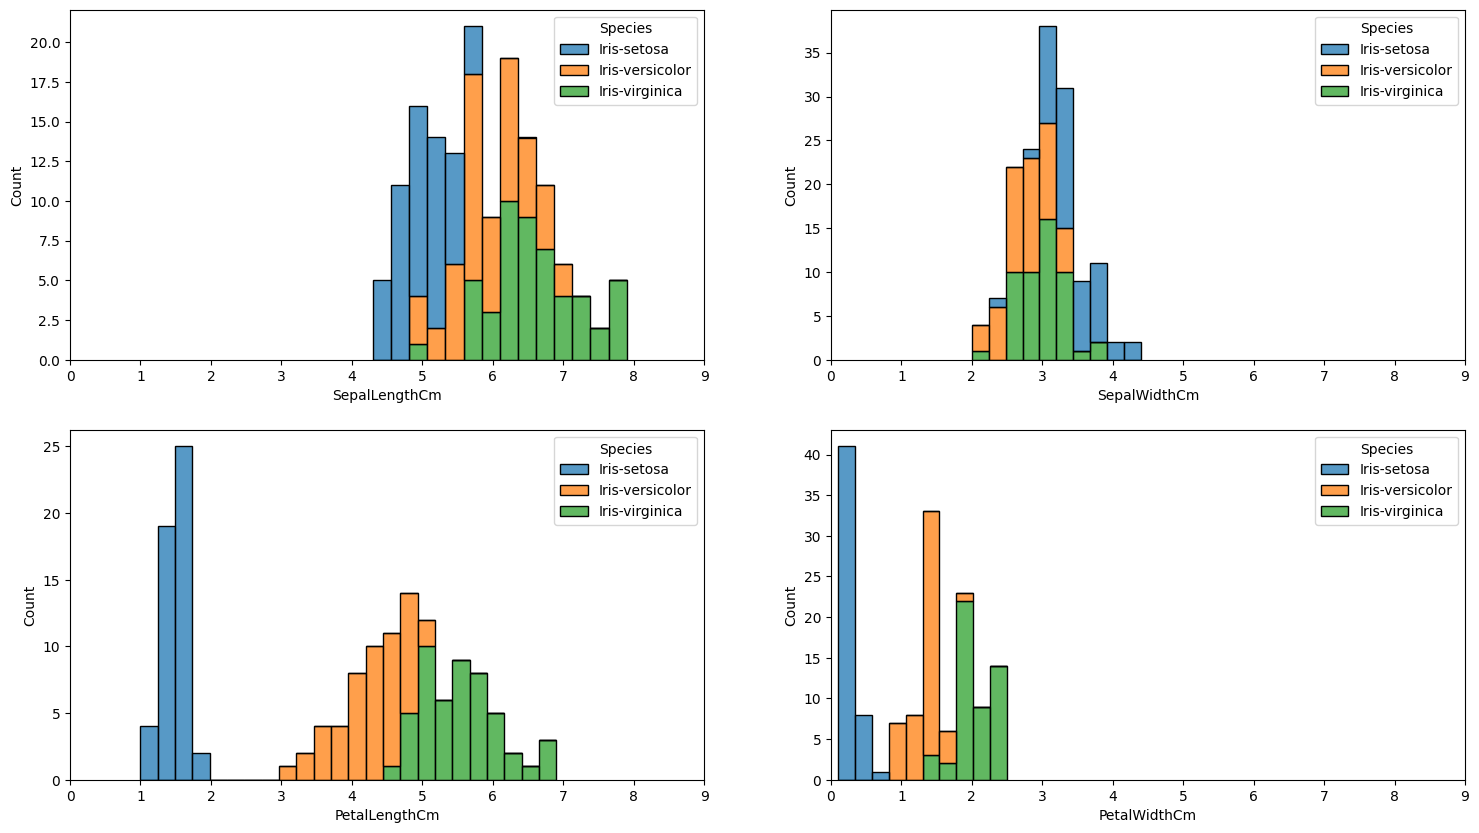

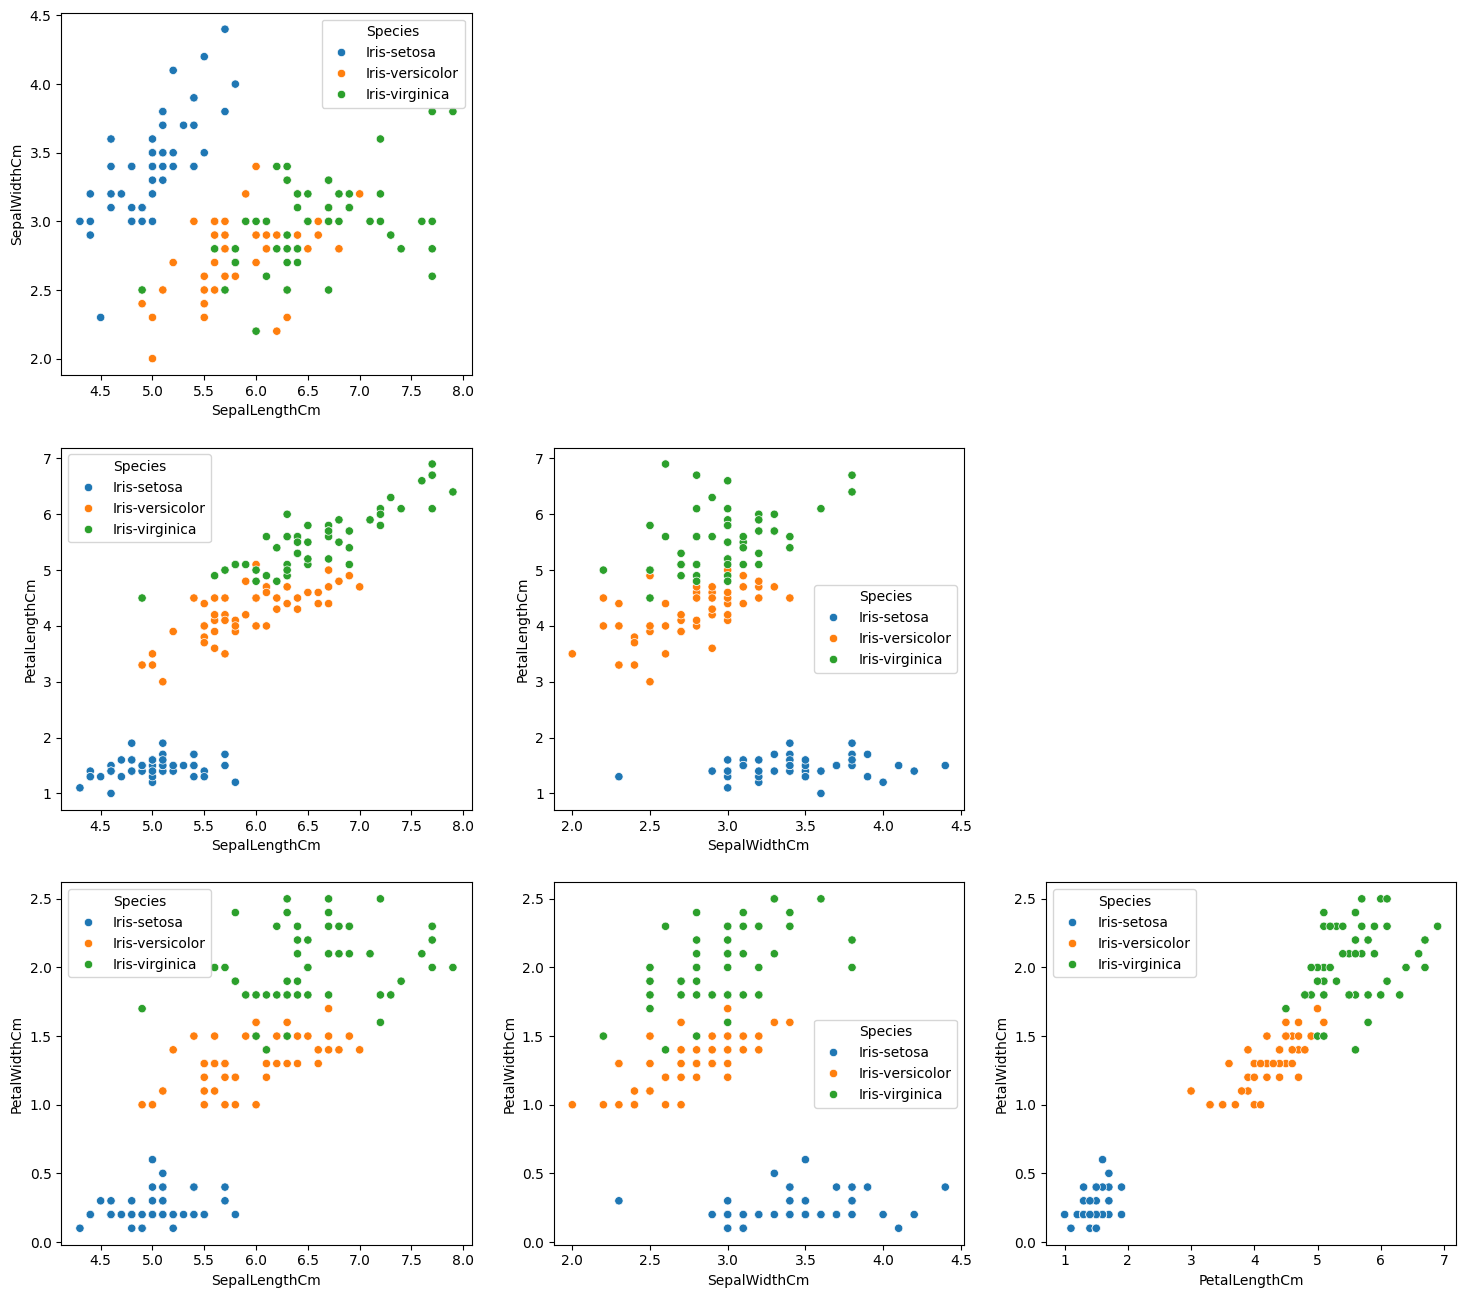

In [71]:
#2 c.Data Visualization 

# Histograms
plt.figure(figsize = (18, 10))

plt.subplot(221)
sns.histplot(data = df, x = 'SepalLengthCm', hue = 'Species', binwidth = 0.25, multiple = 'stack')
plt.xlim(0, 9)

plt.subplot(222)
sns.histplot(data = df, x = 'SepalWidthCm', hue = 'Species', binwidth = 0.25, multiple = 'stack')
plt.xlim(0, 9)

plt.subplot(223)
sns.histplot(data = df, x = 'PetalLengthCm', hue = 'Species', binwidth = 0.25, multiple = 'stack')
plt.xlim(0, 9)

plt.subplot(224)
sns.histplot(data = df, x = 'PetalWidthCm', hue = 'Species', binwidth = 0.25, multiple = 'stack')
plt.xlim(0, 9)


#Scatter plot
plt.figure(figsize = (18, 16))
plt.subplot(331)
sns.scatterplot(data = df, x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species')
plt.subplot(334)
sns.scatterplot(data = df, x = 'SepalLengthCm', y = 'PetalLengthCm', hue = 'Species')

plt.subplot(335)
sns.scatterplot(data = df, x = 'SepalWidthCm', y = 'PetalLengthCm', hue = 'Species')

plt.subplot(337)
sns.scatterplot(data = df, x = 'SepalLengthCm', y = 'PetalWidthCm', hue = 'Species')

plt.subplot(338)
sns.scatterplot(data = df, x = 'SepalWidthCm', y = 'PetalWidthCm', hue = 'Species')

plt.subplot(339)
sns.scatterplot(data = df, x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species')
plt.show()




In [72]:
#2 d.Data exploration
# Summary of number of records by species
df_part = df.groupby('Species').count()
print("\nSummary of number of records by species:")
print( df_part.head())  

# Summary of average measurement value by species
df_mean = df.groupby('Species').mean()
print("\nSummary of average measurement value by species:")
print(df_mean.head())  
df_mean.head()
# Summary of maximum measurement value by species
df_max = df.groupby('Species').max()
print("\nSummary of maximum measurement value by species:")
print(df_max.head())


Summary of number of records by species:
                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                      
Iris-setosa      50             50            50             50            50
Iris-versicolor  50             50            50             50            50
Iris-virginica   50             50            50             50            50

Summary of average measurement value by species:
                    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                              
Iris-setosa       24.5          5.006         3.418          1.464   
Iris-versicolor   74.5          5.936         2.770          4.260   
Iris-virginica   124.5          6.588         2.974          5.552   

                 PetalWidthCm  
Species                        
Iris-setosa             0.244  
Iris-versicolor         1.326  
Iris-virginica          2.026  

Summar

Missing values in each column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
No duplicate rows found in the dataset.


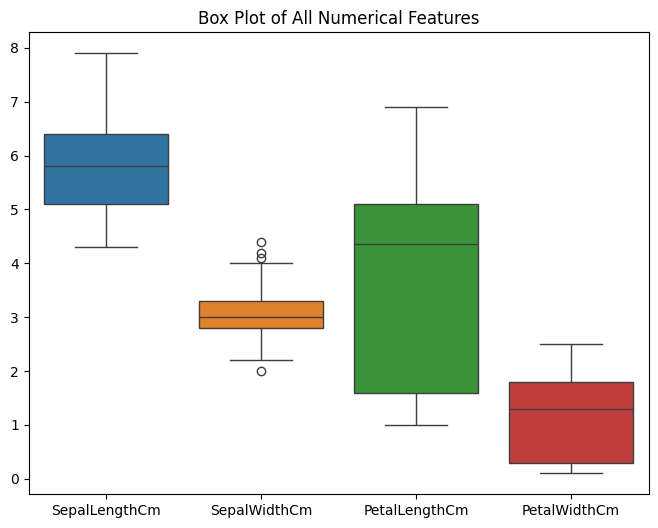

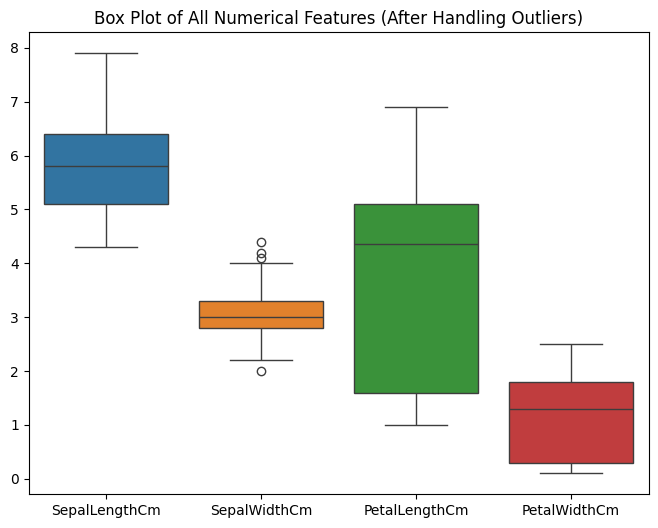


Skewness of each numerical feature:
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalWidthCm    -0.104997
PetalLengthCm   -0.274464
dtype: float64


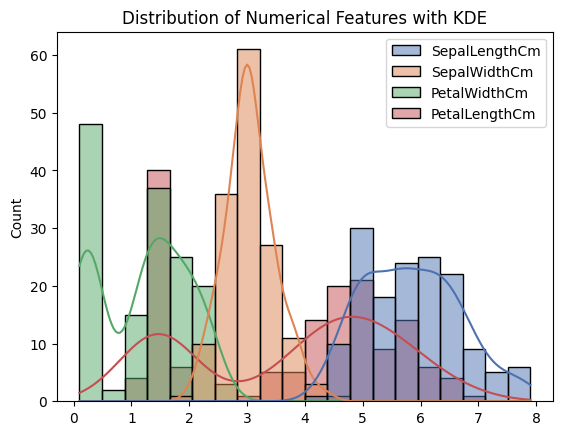

In [73]:
#3.	Data Pre-processing and cleaning
# Define the numerical columns to analyze
numerical_columns =['SepalLengthCm','SepalWidthCm','PetalWidthCm','PetalLengthCm']
# 3a.1: Identify Missing Values
print("Missing values in each column:")
print(df.isna().sum())

# 3a.2:# Check for duplicate rows
duplicates = df[df.duplicated()]

# Print duplicate rows (if any)
if not duplicates.empty:
    print("Duplicate Rows:\n", duplicates)
else:
    print("No duplicate rows found in the dataset.")


#Drop Id 
df = df.drop(columns=['Id'])
# 3a.3:Visualize outliers using box plots
# Display a single box plot for all numerical columns
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)  # Using 'data=df' to plot all numerical columns in one box plot
plt.title("Box Plot of All Numerical Features")
plt.show()

#Handle Outliers by Clipping Using IQR
# Handling Outliers in Sepal Width using IQR
Q1 = df['SepalWidthCm'].quantile(0.25)
Q3 = df['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#there is no much change after handling outlier,which means it has means it is a minimal outlier

# Visualize Box Plot After Handling Outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title("Box Plot of All Numerical Features (After Handling Outliers)")
plt.show()


# 3a.4: Check for Skewness
print("\nSkewness of each numerical feature:")
print(df[numerical_columns].skew())

# Visualizing skewness
sns.histplot(df[numerical_columns], kde=True, bins=20, palette='deep')
plt.title("Distribution of Numerical Features with KDE")
plt.show()


In [74]:
# 3b-Applying Transformation techniques
# i:Encoding-we have used encoding to convert 'Species' column value to categorical lables-0,1,2
#0-Iris-setosa
#1-Iris-versicolor
#2-Iris-virginica
print("\nEncoding:")
le = LabelEncoder()  
df['Species']=le.fit_transform(df['Species'])
print(df[['Species']])

#ii.Standardization
#Since the Iris dataset’s features vary slightly in scale, standardization can make the model more stable and interpretable.
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df) 
print("\nStandardized data:")
print(df)

#iii.Normalization
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)
print("\nNormalized data:")
print(df)

#iv.Log transformation on one column
df_log_transformed = df.copy()
df_log_transformed['SepalWidthCm)'] = np.log1p(df['SepalWidthCm'])# Applying log transformation to skewed column
# Print only the transformed Sepal Width column after log transformation
print(df[['SepalWidthCm']])







Encoding:
     Species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]

Standardized data:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149     

Correlation Matrix:
                SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954   
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544   
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757   
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000   
Species             0.782561     -0.419446       0.949043      0.956464   

                Species  
SepalLengthCm  0.782561  
SepalWidthCm  -0.419446  
PetalLengthCm  0.949043  
PetalWidthCm   0.956464  
Species        1.000000  


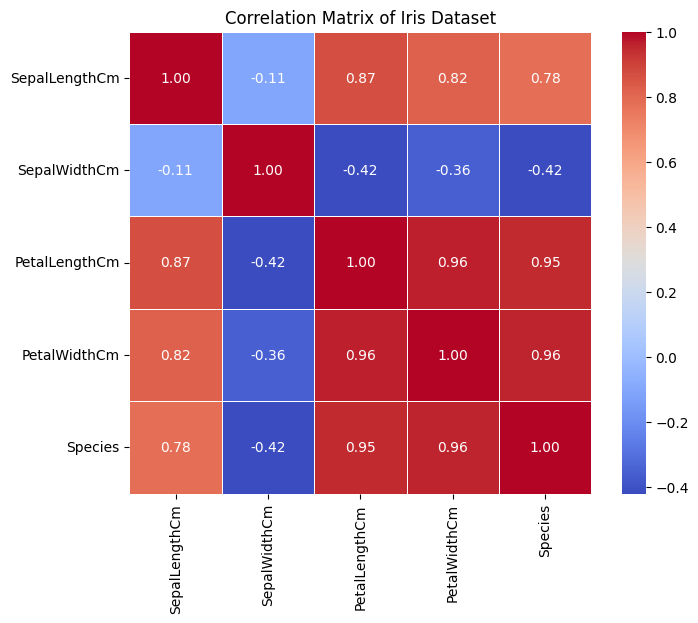

In [75]:
#3 c.Correlational analysis

# Calculating the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Iris Dataset")
plt.show()
#Strong positive correlation value:0.96
#From the correlation matrix,we observe that PetalLengthcm and PetalWidthcm columns have most strongly positively correlated features in the Iris dataset.

In [76]:
#4 a.Final feature selection and extracting them into Column X and the class label into Column into Y. 
# Set up the data set for machine learning algorithms
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] #Iris features
Y = df['Species'] #Target column

#4 b.Split the data set into test and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

#Output
# X_train shape: (105, 4): This indicates that X_train contains 105 samples with 4 features each.
#X_test shape: (45, 4): X_test contains 45 samples with 4 features each.
#Y_train shape: (105,): Y_train contains 105 labels corresponding to the training samples.
#Y_test shape: (45,): Y_test contains 45 labels corresponding to the test samples.

#Combining X and Y training and test sets for saving into CSV
train_data = pd.concat([X_train, Y_train], axis=1)
test_data = pd.concat([X_test, Y_test], axis=1)

# Saving the training and test sets to CSV files
train_data.to_csv("iris_train.csv", index=False)
test_data.to_csv("iris_test.csv", index=False)

print("Training and test sets have been saved as 'iris_train.csv' and 'iris_test.csv'.")


X_train shape: (105, 4)
X_test shape: (45, 4)
Y_train shape: (105,)
Y_test shape: (45,)
Training and test sets have been saved as 'iris_train.csv' and 'iris_test.csv'.


In [77]:
# Initialize Spark session
spark = SparkSession.builder \
    .appName("Model Building") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()

spark.conf.set("spark.sql.execution.arrow.enabled", "true")
spark_train_df = spark.createDataFrame(train_data) 

# Assemble features
assembler = VectorAssembler(inputCols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], outputCol='features')
spark_train_df = assembler.transform(spark_train_df)

# Use StringIndexer to convert the label column
indexer = StringIndexer(inputCol="Species", outputCol="label")
spark_train_df = indexer.fit(spark_train_df).transform(spark_train_df)

# Create and train the models
models = {
    "Logistic Regression": LogisticRegression(featuresCol='features', labelCol='label'),
    "Decision Tree": DecisionTreeClassifier(featuresCol='features', labelCol='label'),
    "Random Forest": RandomForestClassifier(featuresCol='features', labelCol='label')
}

try:
    for name, model in models.items():
        # Train the model
        model_fit = model.fit(spark_train_df)
        predictions = model_fit.transform(spark_train_df)

        # Print training accuracy
        evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
        accuracy = evaluator.evaluate(predictions)
        print(f"Model: {name}, Training Accuracy: {accuracy:.4f}")

        # If it's Logistic Regression, print loss
        if isinstance(model, LogisticRegression):
            print(f"Logistic Regression Loss: {model_fit.summary.objectiveHistory[-1]:.4f}")

except Exception as e:
    print(f"Error during model training: {e}")



Model: Logistic Regression, Training Accuracy: 0.9810
Logistic Regression Loss: 0.0532
Model: Decision Tree, Training Accuracy: 1.0000
Model: Random Forest, Training Accuracy: 0.9905


In [78]:

spark_test_df = spark.createDataFrame(test_data)  # Assuming test_data is predefined

# Assemble features
assembler_new = VectorAssembler(inputCols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], outputCol='features')
spark_test_df = assembler_new.transform(spark_test_df)

# Use StringIndexer to convert the label column
indexer = StringIndexer(inputCol="Species", outputCol="label")
spark_test_df = indexer.fit(spark_test_df).transform(spark_test_df)

# Create and train the models
models = {
    "Logistic Regression": LogisticRegression(featuresCol='features', labelCol='label'),
    "Decision Tree": DecisionTreeClassifier(featuresCol='features', labelCol='label'),
    "Random Forest": RandomForestClassifier(featuresCol='features', labelCol='label')
}

try:
    for name, model in models.items():
        test_model_fit = model.fit(spark_train_df)
        # Make predictions on test data
        test_predictions = test_model_fit.transform(spark_test_df)

        # Create temporary view for SQL-based confusion matrix
        test_predictions.createOrReplaceTempView("predictions")
    
        
        confusion_matrix = test_predictions.groupBy("label", "prediction").agg(F.count("*").alias("count"))
        confusion_matrix_data = confusion_matrix.collect()

        # Show confusion matrix
        print(f"Confusion Matrix for {name}:")
        confusion_matrix.show(truncate=False)

        predictions_display = test_predictions.select("label", "prediction")
        print(f"Predictions using {name}:")
        predictions_display.show(truncate=False) 

except Exception as e:
    print(f"Error during model training: {e}")

# Stop Spark session
spark.stop()



Confusion Matrix for Logistic Regression:
+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|1.0  |0.0       |13   |
|0.0  |2.0       |19   |
|2.0  |1.0       |13   |
+-----+----------+-----+

Predictions using Logistic Regression:
+-----+----------+
|label|prediction|
+-----+----------+
|1.0  |0.0       |
|0.0  |2.0       |
|2.0  |1.0       |
|1.0  |0.0       |
|1.0  |0.0       |
|0.0  |2.0       |
|1.0  |0.0       |
|2.0  |1.0       |
|1.0  |0.0       |
|1.0  |0.0       |
|2.0  |1.0       |
|0.0  |2.0       |
|0.0  |2.0       |
|0.0  |2.0       |
|0.0  |2.0       |
|1.0  |0.0       |
|2.0  |1.0       |
|1.0  |0.0       |
|1.0  |0.0       |
|2.0  |1.0       |
+-----+----------+
only showing top 20 rows

Confusion Matrix for Decision Tree:
+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|1.0  |0.0       |11   |
|0.0  |2.0       |19   |
|2.0  |1.0       |13   |
|1.0  |1.0       |2    |
+-----+----------+-----+

Predictions using Decisi